In [1]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import datasets

### Load data from sklearn.datasets

In [2]:
n_samples=1000
#data = datasets.make_circles(n_samples=n_samples, factor=.4,noise=.05)
data = datasets.make_moons(n_samples=n_samples, noise=.05)
#data=datasets.make_blobs(n_samples=n_samples, centers=2,cluster_std=0.8)

In [3]:
points=data[0]
labels=data[1]
train_points=points[:int(n_samples*0.8)]
train_labels=labels[:int(n_samples*0.8)]
test_points=points[int(n_samples*0.8):]
test_labels=labels[int(n_samples*0.8):]

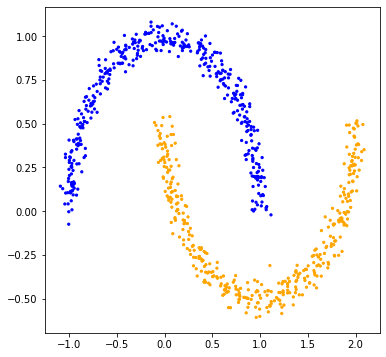

In [4]:
#Plot the training set
x_train=[train_points[i][0] for i in range(len(train_points))]
y_train=[train_points[i][1] for i in range(len(train_points))]
colors=np.array(['blue','orange'])
plt.figure(figsize=(6,6))
plt.scatter(x_train,y_train,c=colors[train_labels],s=5)

### Define Neural Network

In [5]:
# Create a network with:
#    input layer with 2 neurons, (x,y)-coordinates
#    2 hidden layers of 32 neurons each
#    output layer of 1 neuron
model = tf.keras.Sequential(name="2D_Classifier") 
model.add(keras.layers.InputLayer(input_shape=(2,)))
model.add(keras.layers.Dense(4,activation='tanh', name="hidden_layer_1"))
model.add(keras.layers.Dense(4,activation='tanh', name="hidden_layer_2"))
model.add(keras.layers.Dense(1,activation='linear', name="output_layer"))
model.build()

There are of course other kind of layers, not only Dense. I believe we will also need convolutional and pooling layers for our task. They can also be found in keras,

https://keras.io/api/layers/

https://keras.io/api/layers/convolution_layers/convolution2d/

https://keras.io/api/layers/pooling_layers/max_pooling2d/

https://keras.io/api/layers/pooling_layers/average_pooling2d/

In [6]:
model.summary()

Model: "2D_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 4)                 12        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


### Train Neural Network 

In [7]:
model.compile(optimizer='adam',loss='mse')
#this just means that we want to minimize the mean squared error

In [8]:
#and this is the actual training part
points=np.array([np.array(i) for i in points])
labels=np.array([np.array(i) for i in labels])
model.fit(train_points, train_labels,batch_size=50, epochs=200, shuffle=True,verbose=0)

_=model.evaluate(train_points, train_labels, batch_size=128)

800/800 [==============================] - 0s 127us/sample - loss: 0.0300


In [9]:
# Compute accuracy on train set
def accuracy(list1,list2):
    num_correct_predictions=0
    for i in range(len(list1)):
        if list1[i]>0.5 and list2[i]>0.5 or list1[i]<0.5 and list2[i]<0.5:
            num_correct_predictions+=1
    print("accuracy: %.2f" % (num_correct_predictions/len(list1)) )
accuracy(train_labels,model.predict(train_points))

accuracy: 0.97


### Evaluate on test set

In [10]:
# Compute accuracy on test set
_=model.evaluate(test_points, test_labels, batch_size=128)
accuracy(test_labels,model.predict(test_points))

200/200 [==============================] - 0s 15us/sample - loss: 0.0245
accuracy: 0.98


### Plot

In [11]:
#create a fine grid and evaluate the network on it
N=100
x=[i[0] for i in points]
y=[i[1] for i in points]
x_min,x_max=max(x),min(x)
y_min,y_max=max(y),min(y)
gridpoints=np.array([np.array([x_min+(x_max-x_min)*x/N,y_min+(y_max-y_min)*y/N]) for x in range(0,N) for y in range(0,N)])
gridpoint_predictions=np.array(model.predict([gridpoints]))
gridlabels=list(map((lambda x: 1 if x>0.5 else 0),gridpoint_predictions))

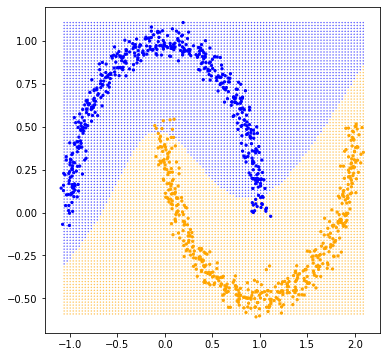

In [12]:
#plot
grid_x=[i[0] for i in gridpoints]
grid_y=[i[1] for i in gridpoints]
colors=np.array(['blue','orange'])
plt.figure(figsize=(6,6))
plt.scatter(grid_x,grid_y,c=colors[gridlabels],s=0.1)
plt.scatter(x,y,c=colors[labels],s=5)

### Save&Load Model

In [13]:
#save model
model.save_weights('./2d_classifier/weights')
del model
# Create a new model with same structure
model = tf.keras.Sequential(name="2D_Classifier") 
model.add(keras.layers.InputLayer(input_shape=(2,)))
model.add(keras.layers.Dense(4,activation='tanh', name="hidden_layer_1"))
model.add(keras.layers.Dense(4,activation='tanh', name="hidden_layer_2"))
model.add(keras.layers.Dense(1,activation='linear', name="output_layer"))
model.build()

# Restore the weights
model.load_weights('./2d_classifier/weights')